In [128]:
import pandas as pd

data = pd.read_csv('used_cars_data.csv')
data = data.drop('S.No.', axis='columns')
data = data.drop('New_Price', axis='columns')

data.insert(3, 'Car_Age', 2024 - data['Year'])

mahindraData = data['Name'] == 'Mahindra E Verito D4'
data.loc[mahindraData, 'Mileage'] = '15.7 kmpl'
priusData = data['Name'] == 'Toyota Prius 2009-2016 Z4'
data.loc[priusData, 'Mileage'] = '18.62 kmpl'

data.to_csv('used_cars_data_modified.csv', encoding='utf-8', index=False)

1. To remove S.No. and New_Price columns, I first read the csv using pd.read_csv and set it to data. I then modified data using data.drop() and removed the 'S.No.' and 'New_Price' columns. 

To add the 'Car_Age' column, I used data.insert() and inserted this calculated data into column 3 so it would be next to the 'Year' column.

Next, I found the Electric vehicles by using Command F in the csv file and searching for 'electric'. The first row I found containing this was 'Mahindra E Verito D4,Chennai,2016,8,50000,Electric,Automatic,First,,72 CC,41 bhp,5.0,13.0'. I then googled the 2016 Mahindra E Verito D4 mileage. I found the value at https://www.carwale.com/mahindra-cars/verito/mileage/#:~:text=Mahindra%20Verito%20mileage%20starts%20at,Mahindra%20Verito%20is%2021%20kmpl to be 15.7 kmpl. This  site cites the Automotive Research Association of India as its source so I deemed it to be trustworthy.
The next Electric vehicle was 'Toyota Prius 2009-2016 Z4,Mumbai,2011,13,44000,Electric,Automatic,First,,1798 CC,73 bhp,5.0,12.75'. After Googling it, the average mpg of the car is 50. The source is https://www.kbb.com/toyota/prius/2011/ which I deemed to also be trustworthy as its the official Kelly Blue Book.
To try and be as accurate as possible, I decided to calculate how car mileage depreciates over time. I found from this source https://www.quora.com/How-much-does-gas-mileage-of-a-vehicle-degrade-over-time-If-a-new-vehicle-got-18-24-mpg-in-2013-how-much-is-it-likely-to-get-in-2018 that after 10 years, car mileage goes down approximately 10-15%. Taking the mean of this, we can say it loses 12.5% of its mileage which means the Mahindra E Verito D4 now gets 13.7375 kmpl or ~13.74 kmpl and the 2011 Prius now gets 43.8 mpg. Finally, we convert the Prius mileage to kmpl to match units with the other options. We get 18.62129kmpl or ~18.62 kmpl. This calculation was done using Google's Fuel Economy conversion tool.

Finally, to check that the output was correct, I wrote this modified data into another csv file called 'used_car_data_modified.csv' using data.to_csv() and checked it.

In [129]:
data = pd.read_csv('used_cars_data_modified.csv')

mileageList = data.get('Mileage').tolist()
engineList = data.get('Engine').tolist()
powerList = data.get('Power').tolist()

mileageUnits = []
engineUnits = []
powerUnits = []

rmList = '1234567890. '
for x in mileageList:
  mileageUnits.append(''.join([i for i in x if i not in rmList]))
for x in engineList:
  x=str(x)
  engineUnits.append(''.join([i for i in x if i not in rmList]))
for x in powerList:
  x=str(x)
  powerUnits.append(''.join([i for i in x if i not in rmList]))

diffUnits = []
for x in mileageUnits:
  if x not in diffUnits:
    diffUnits.append(x)

diffUnits = []
for x in engineUnits:
  if x not in diffUnits:
    diffUnits.append(x)

diffUnits = []
for x in powerUnits:
  if x not in diffUnits:
    diffUnits.append(x)

def convertMileage(mileage):
  value, unit = mileage.split(' ')
  value = float(value)
  
  if unit == 'km/kg':
      value = round(value / 0.775, 2)
  
  return value

def convertEngine(engine):
  if type(engine) == str:
    value, unit = engine.split(' ')
    value = int(value)
    return value
  return engine

def convertPower(power):
  if type(power) == str:
    value, unit = power.split(' ')
    if value == 'null':
      return value
    return float(value)
  return power

data['Mileage'] = data['Mileage'].apply(convertMileage)
data['Engine'] = data['Engine'].apply(convertEngine)
data['Power'] = data['Power'].apply(convertPower)
data.rename(columns={'Mileage': 'Mileage(kmpl)'}, inplace=True)
data.rename(columns={'Engine': 'Engine(CC)'}, inplace=True)
data.rename(columns={'Power': 'Power(bhp)'}, inplace=True)
data.to_csv('used_cars_data_converted.csv', encoding='utf-8', index=False)

2. First, I wrote code to check what units are within each list. In Mileage, I found both km/kg and kmpl were used. In Engine, I found CC was used but there were 'nan' values. In Power, I found bhp was used but there were also 'null bhp' and 'nan' values. In Mileage, I decided to convert all values to kmpl which required multiplying all km/kg values by 1 kg / 0.775 liter to get all values in kmpl. (1 kg fuel = 0.775 liter value from https://ipshita.medium.com/run-through-of-eda-and-feature-engineering-8511d3a6f863#:~:text=Convert%20data%20to%20string,change%20it%20to%20km/l). Now, all Mileage units were in kmpl, all Engine units were in CC, and all Power units were in bhp. I did not touch the 'nan' or 'null bhp' values yet.

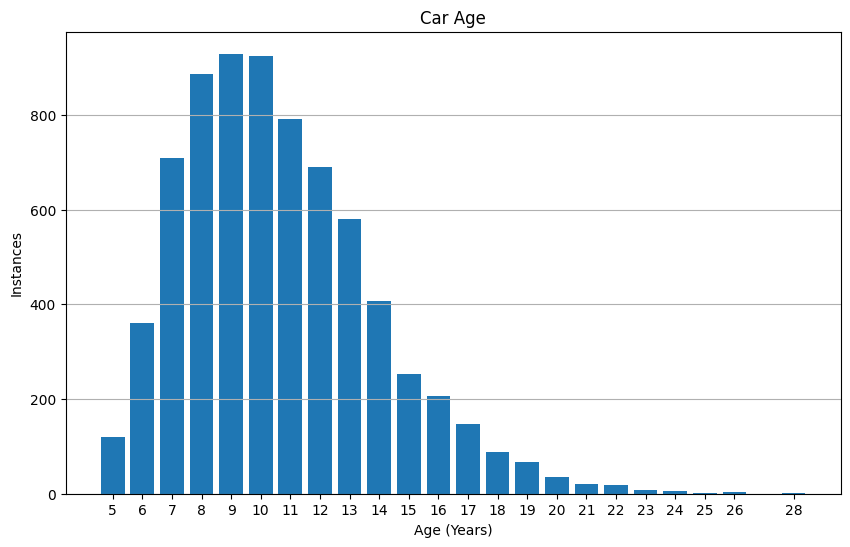

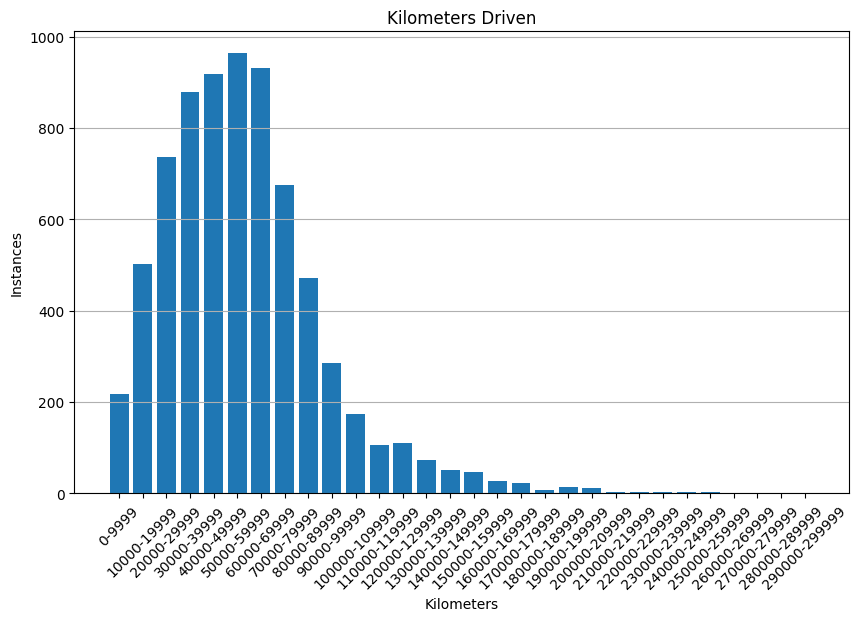

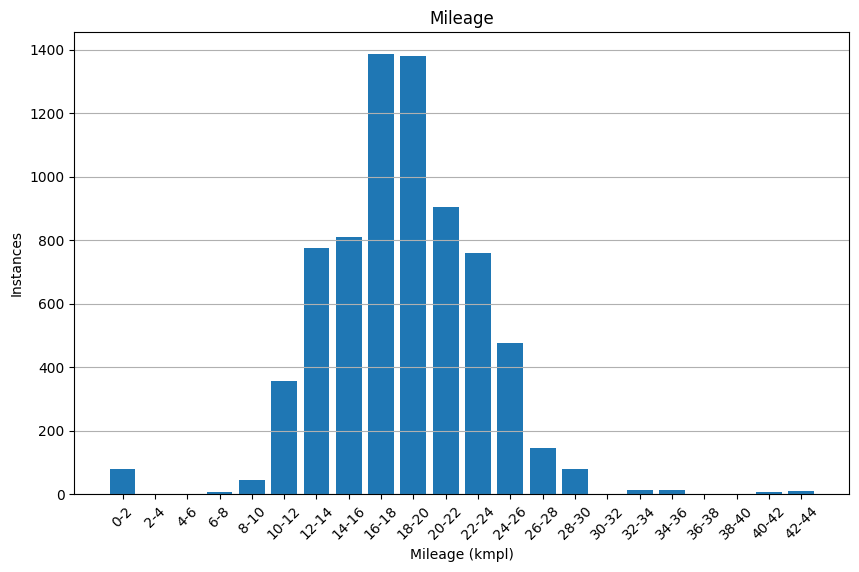

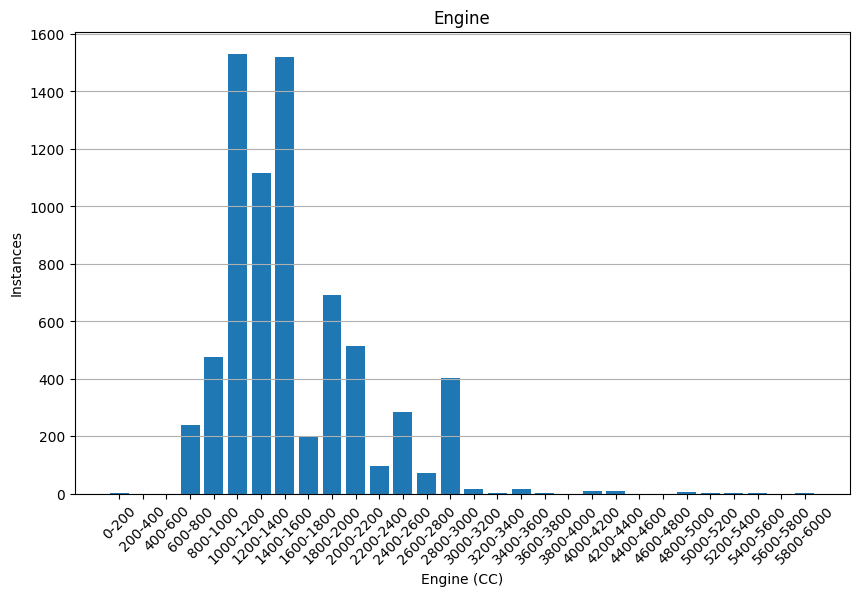

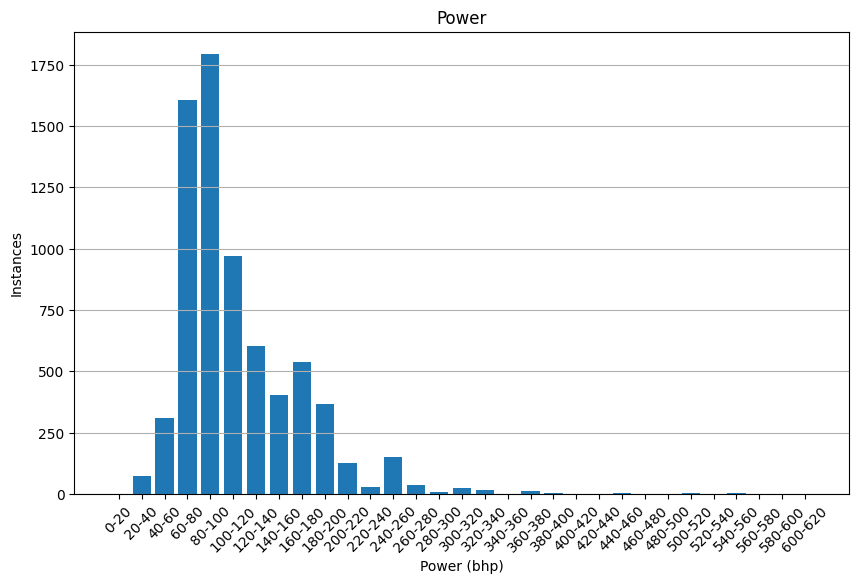

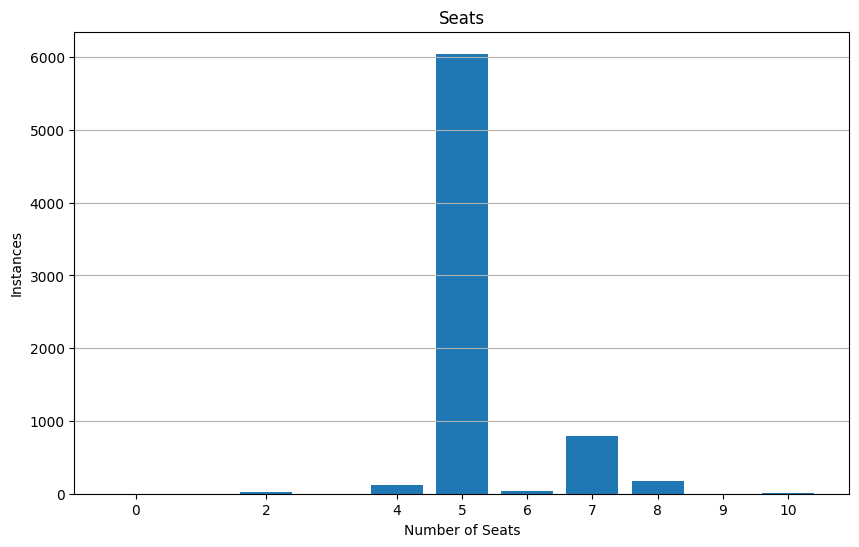

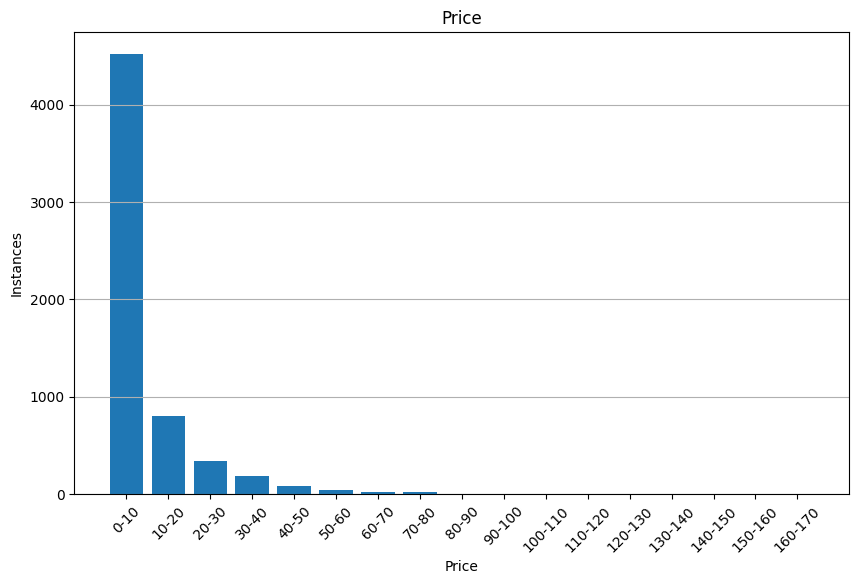

Car_Age Number of Outliers:  58
Kilometers_Driven Number of Outliers:  3806
Mileage(kmpl) Number of Outliers:  43
Engine(CC) Number of Outliers:  0
Power(bhp) Number of Outliers:  0
Seats Number of Outliers:  0
Price Number of Outliers:  0


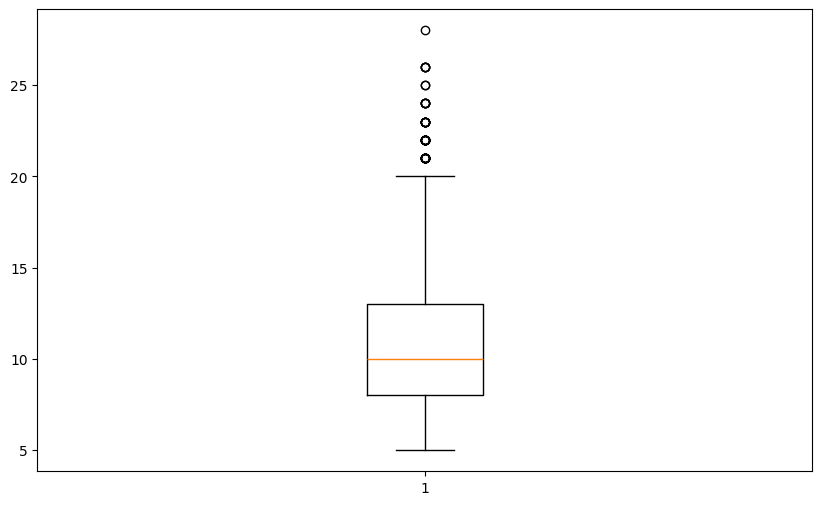

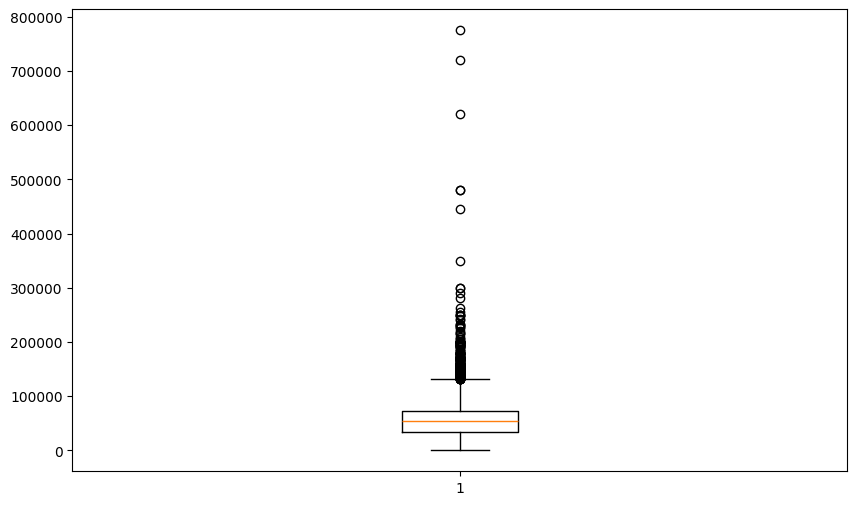

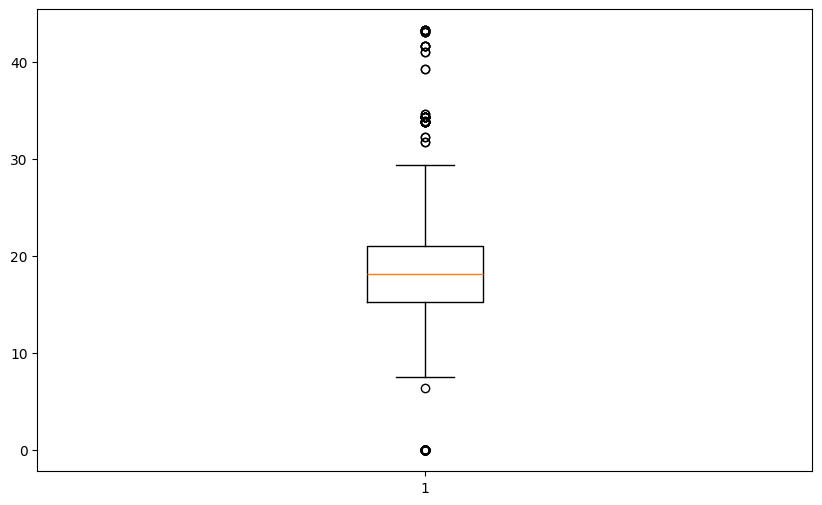

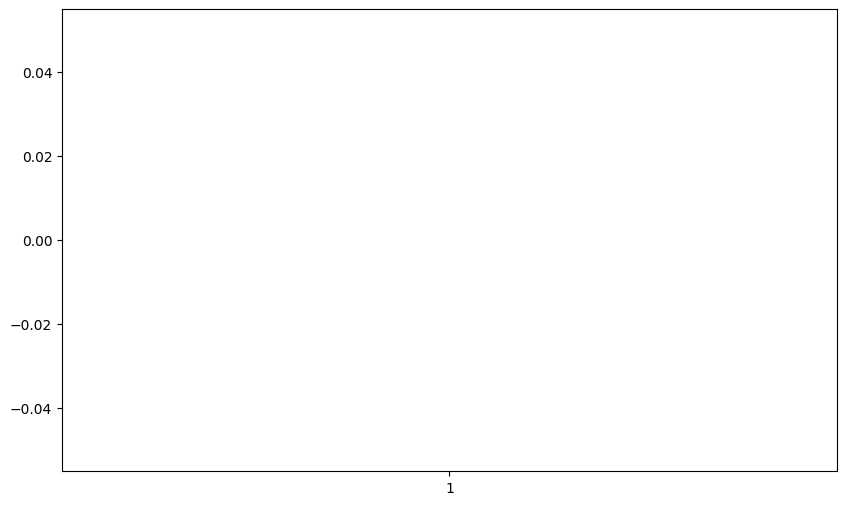

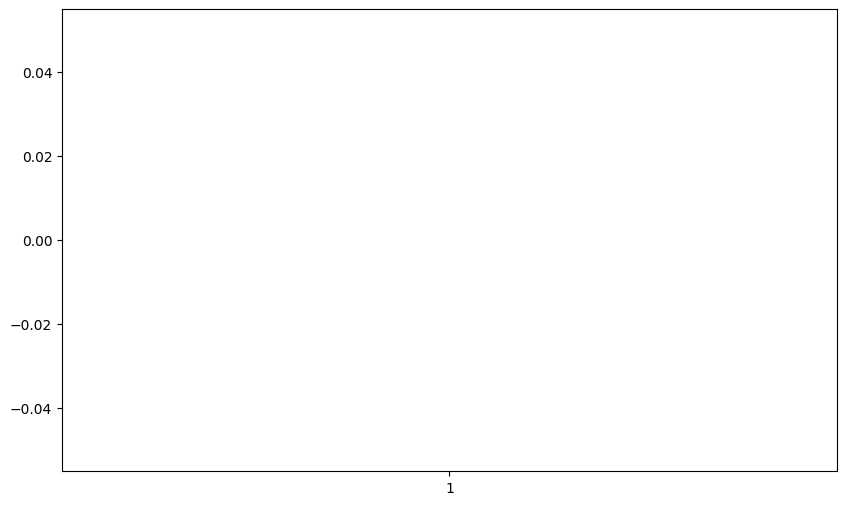

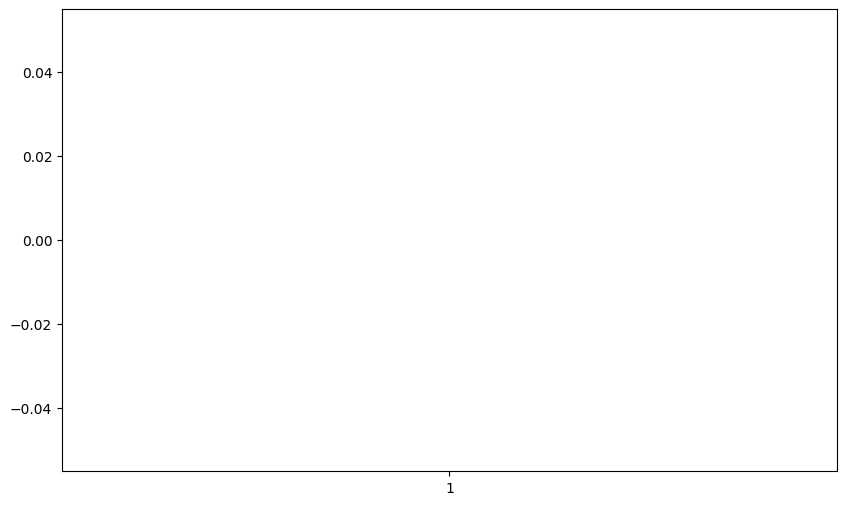

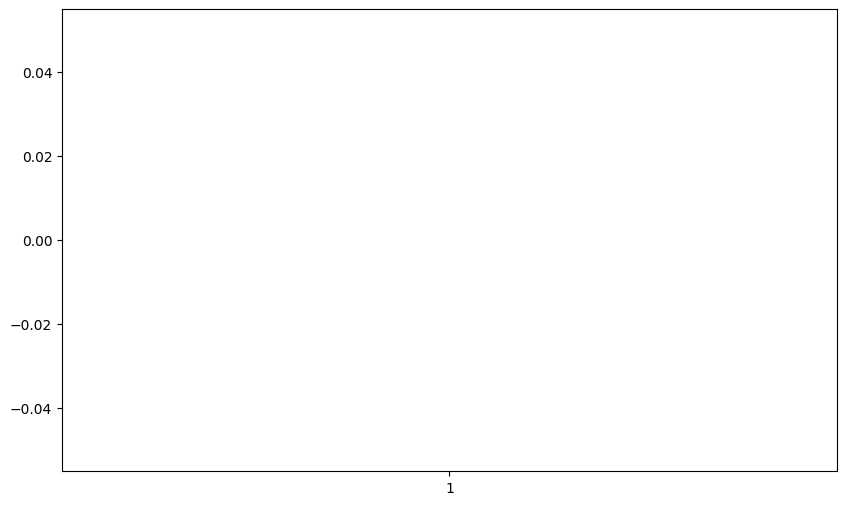

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

data = pd.read_csv('used_cars_data_converted.csv')

carAges = data['Car_Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(carAges.index, carAges.values)
plt.xlabel('Age (Years)')
plt.ylabel('Instances')
plt.title('Car Age')
plt.xticks(carAges.index)
plt.grid(axis='y')


upper_limit = 300000 # Hard coded upper limit because there was some crazy outlier here
bins = list(range(0, upper_limit + 1, 10000))
labels = [f'{i}-{i + 9999}' for i in range(0, upper_limit, 10000)]

data['Kilometers_Driven'] = pd.cut(data['Kilometers_Driven'], bins=bins, labels=labels, right=False)

car_age_group_counts = data['Kilometers_Driven'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(car_age_group_counts.index, car_age_group_counts.values)
plt.xlabel('Kilometers')
plt.ylabel('Instances')
plt.title('Kilometers Driven')
plt.xticks(rotation=45) # Made it actually visible
plt.grid(axis='y')


upper_limit = math.floor(data['Mileage(kmpl)'].max() + 1)
bins = list(range(0, upper_limit + 1, 2))
labels = [f'{i}-{i + 2}' for i in range(0, upper_limit, 2)]

data['Mileage(kmpl)'] = pd.cut(data['Mileage(kmpl)'], bins=bins, labels=labels, right=False)

car_age_group_counts = data['Mileage(kmpl)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(car_age_group_counts.index, car_age_group_counts.values)
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Instances')
plt.title('Mileage')
plt.xticks(rotation=45) # Made it actually visible
plt.grid(axis='y')


upper_limit = int(math.floor(data['Engine(CC)'].max() + 1))
bins = list(range(0, upper_limit + 200, 200))
labels = [f'{i}-{i + 200}' for i in range(0, upper_limit, 200)]

data['Engine(CC)'] = pd.cut(data['Engine(CC)'], bins=bins, labels=labels, right=False)

car_age_group_counts = data['Engine(CC)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(car_age_group_counts.index, car_age_group_counts.values)
plt.xlabel('Engine (CC)')
plt.ylabel('Instances')
plt.title('Engine')
plt.xticks(rotation=45) # Made it actually visible
plt.grid(axis='y')


upper_limit = int(math.floor(data['Power(bhp)'].max() + 1))
bins = list(range(0, upper_limit + 20, 20))
labels = [f'{i}-{i + 20}' for i in range(0, upper_limit, 20)]

data['Power(bhp)'] = pd.cut(data['Power(bhp)'], bins=bins, labels=labels, right=False)

car_age_group_counts = data['Power(bhp)'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(car_age_group_counts.index, car_age_group_counts.values)
plt.xlabel('Power (bhp)')
plt.ylabel('Instances')
plt.title('Power')
plt.xticks(rotation=45) # Made it actually visible
plt.grid(axis='y')


carAges = data['Seats'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(carAges.index, carAges.values)
plt.xlabel('Number of Seats')
plt.ylabel('Instances')
plt.title('Seats')
plt.xticks(carAges.index)
plt.grid(axis='y')


upper_limit = int(math.floor(data['Price'].max() + 1))
bins = list(range(0, upper_limit + 10, 10))
labels = [f'{i}-{i + 10}' for i in range(0, upper_limit, 10)]

data['Price'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

car_age_group_counts = data['Price'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(car_age_group_counts.index, car_age_group_counts.values)
plt.xlabel('Price')
plt.ylabel('Instances')
plt.title('Price')
plt.xticks(rotation=45) # Made it actually visible
plt.grid(axis='y')

plt.show()
data = pd.read_csv('used_cars_data_converted.csv')

def convertPrice(price):
  if price:
     return float(price)
  return price

data['Price'] = data['Price'].apply(convertPrice)

def printNumOutliersNonNormal(data, col):
  theList = data.get(col).tolist()
  theList.sort()
  Q1 = np.percentile(theList, 25)
  Q3 = np.percentile(theList, 75)
  IQR = Q3 - Q1

  lower_range = Q1 - 1.5 * IQR
  upper_range = Q3 + 1.5 * IQR

  numOutliers = 0
  for x in data[col]:
    if (x > upper_range) | (x < lower_range):
      numOutliers += 1
  return(numOutliers)

def printNumOutliersNormal(data, col):
  stdev = np.std(data[col])
  mean = np.mean(data[col])
  numOutliers = 0
  for x in data[col]:
    if (x > (3 * stdev + mean)) | (x < (3 * stdev - mean)):
      numOutliers += 1
  return(numOutliers)

data.loc[data['Kilometers_Driven'] == data['Kilometers_Driven'].max(), 'Kilometers_Driven'] = int(np.mean(data['Kilometers_Driven'])) # Setting the insane outlier to the mean to make data more usable

print("Car_Age Number of Outliers: ", printNumOutliersNormal(data, 'Car_Age'))
print("Kilometers_Driven Number of Outliers: ", printNumOutliersNormal(data, 'Kilometers_Driven'))
print("Mileage(kmpl) Number of Outliers: ", printNumOutliersNormal(data, 'Mileage(kmpl)'))
print("Engine(CC) Number of Outliers: ", printNumOutliersNonNormal(data, 'Engine(CC)'))
print("Power(bhp) Number of Outliers: ", printNumOutliersNonNormal(data, 'Power(bhp)'))
print("Seats Number of Outliers: ", printNumOutliersNonNormal(data, 'Seats'))
print("Price Number of Outliers: ", printNumOutliersNonNormal(data, 'Price'))

plt.figure(figsize=(10, 6))
plt.boxplot(data['Car_Age'])

plt.figure(figsize=(10, 6))
plt.boxplot(data['Kilometers_Driven'])

plt.figure(figsize=(10, 6))
plt.boxplot(data['Mileage(kmpl)'])

plt.figure(figsize=(10, 6))
plt.boxplot(data['Engine(CC)'])

plt.figure(figsize=(10, 6))
plt.boxplot(data['Power(bhp)'])

plt.figure(figsize=(10, 6))
plt.boxplot(data['Seats'])

plt.figure(figsize=(10, 6))
plt.boxplot(data['Price'])

plt.show()


3. I started off by creating all the bar charts for the 7 columns, creating bins where appropriate to determine if the data is in normal distribution or non-normal distribution. With this info, I was able to calculate for outliers appropriately, using > Q3 + 1.5x(IQR) or < Q1 - 1.5x(IQR) for non-normal distribution and Outside Mean ± 3 * St Dev for normal distribution. I then printed the number of outliers as requested and created box plots of the data.

/var/folders/vc/kpwvn_g914n06xqf9q_m7vxr0000gn/T/ipykernel_53864/3659613832.py:11: RuntimeWarning: overflow encountered in scalar multiply
  return((n * sumProductXY) - (sumX * sumY)) / np.sqrt(((n * sumXSquared) - (sumX ** 2)) * ((n * sumYSquared) - (sumY ** 2)))
/var/folders/vc/kpwvn_g914n06xqf9q_m7vxr0000gn/T/ipykernel_53864/3659613832.py:11: RuntimeWarning: invalid value encountered in sqrt
  return((n * sumProductXY) - (sumX * sumY)) / np.sqrt(((n * sumXSquared) - (sumX ** 2)) * ((n * sumYSquared) - (sumY ** 2)))


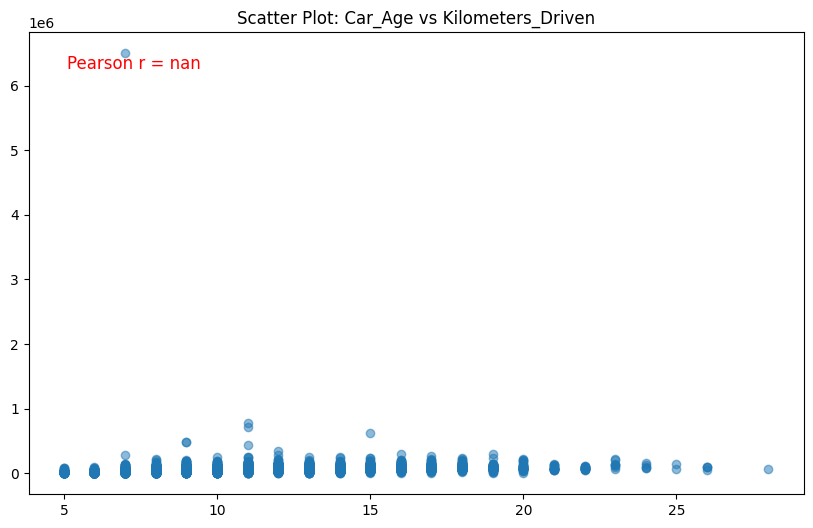

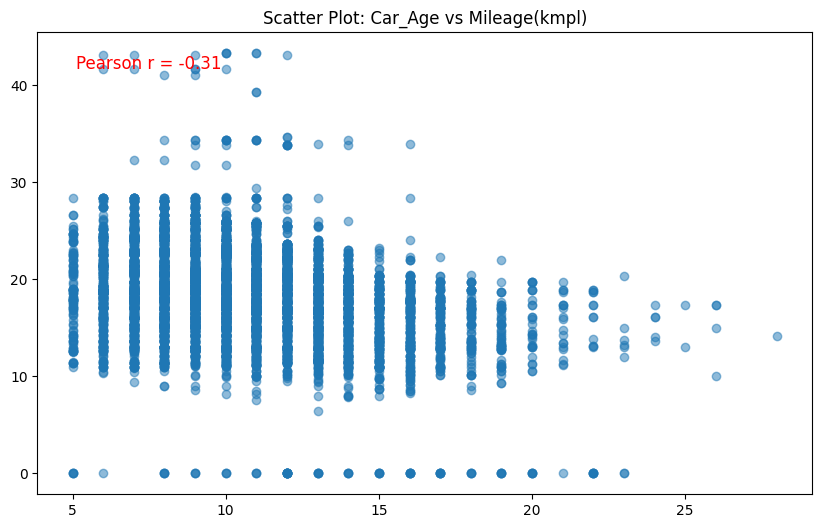

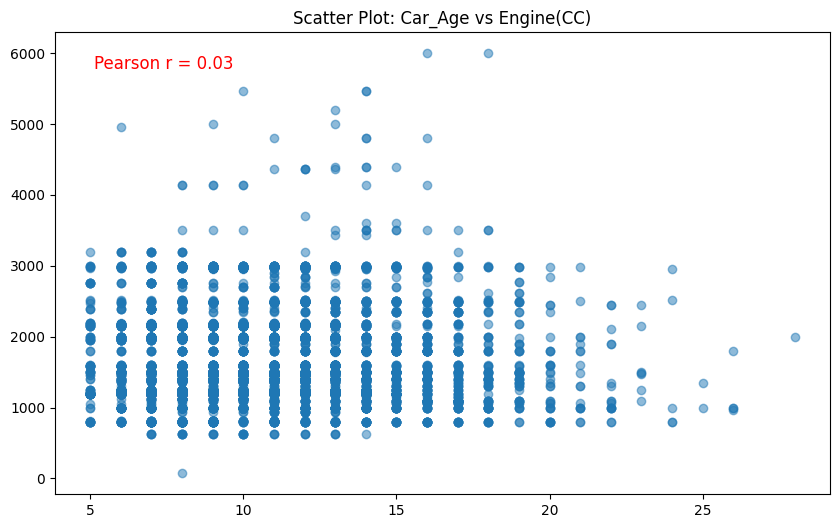

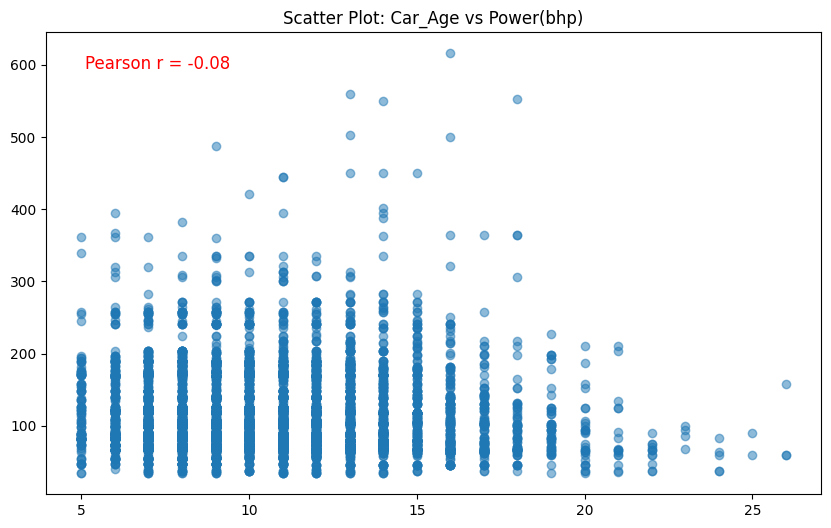

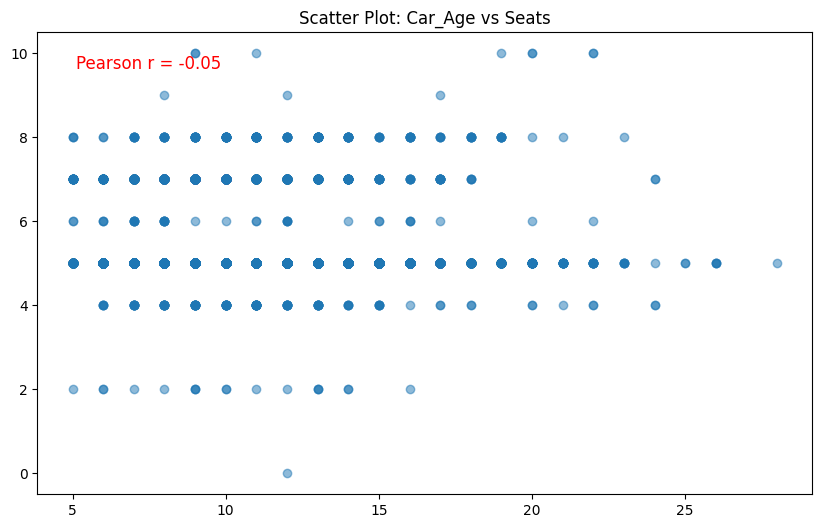

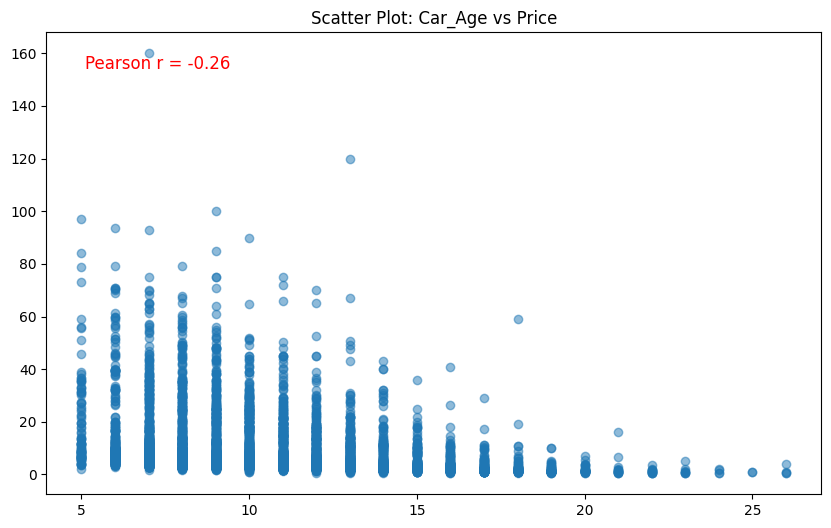

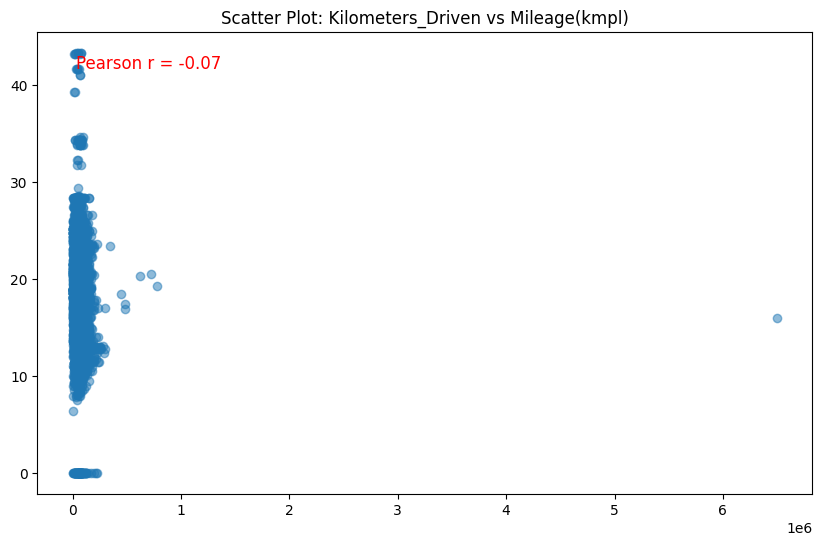

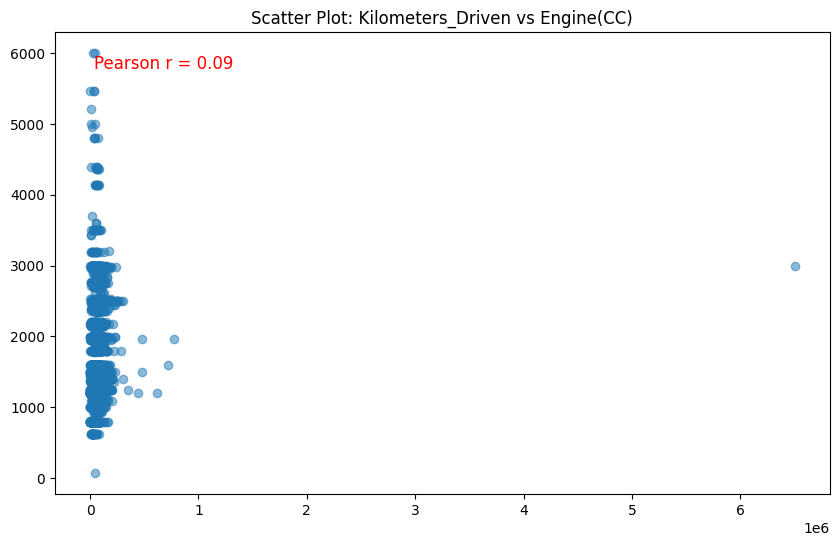

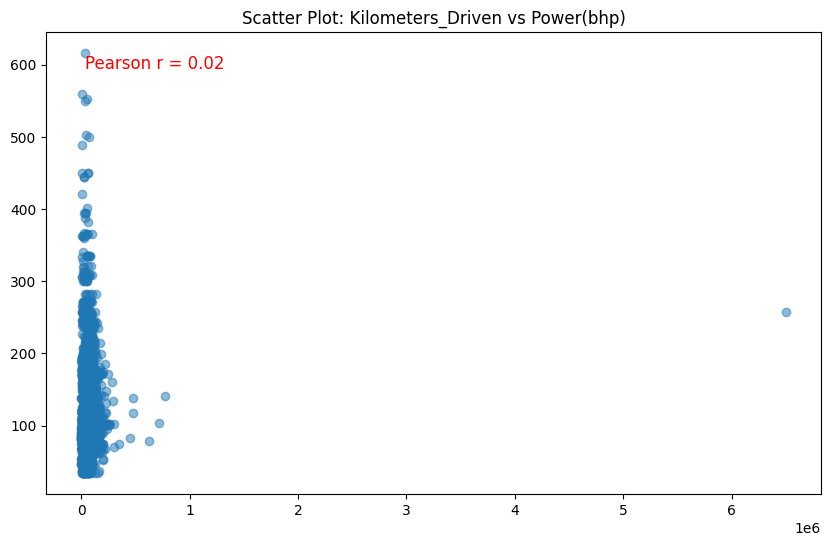

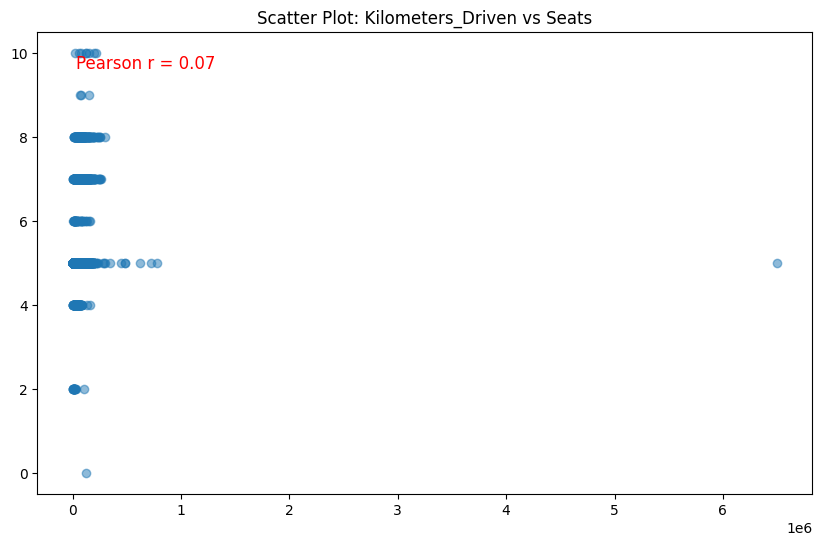

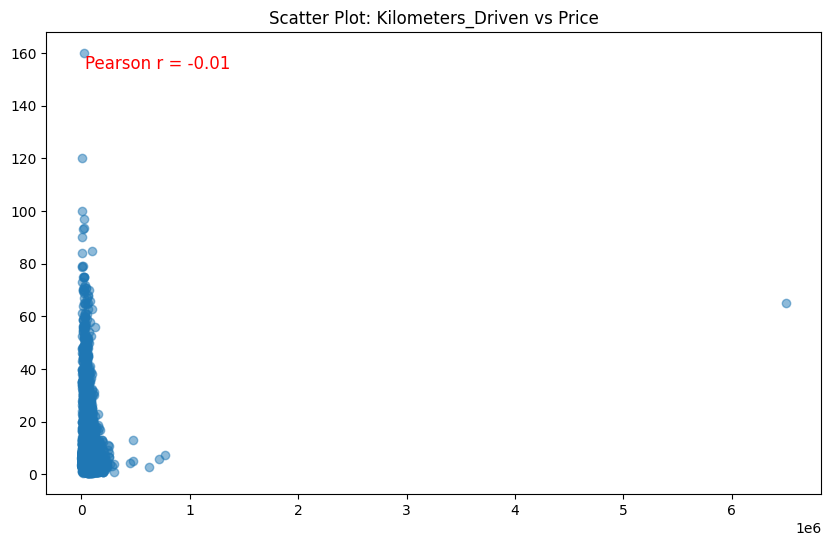

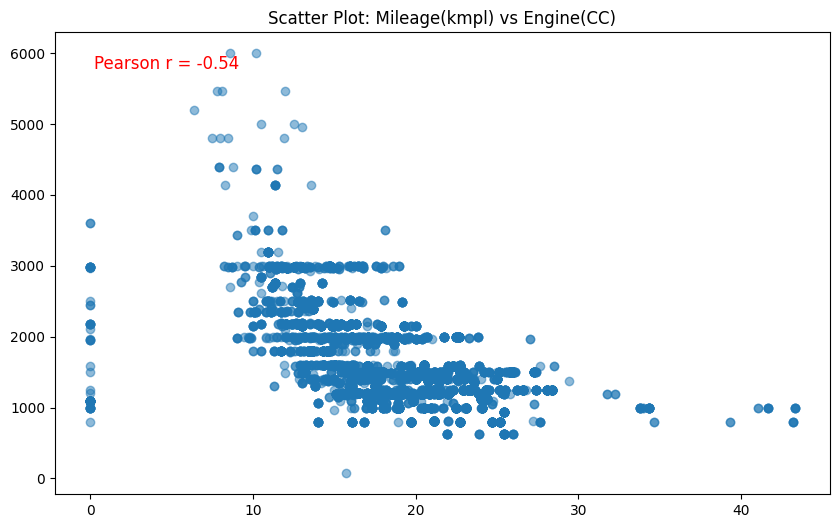

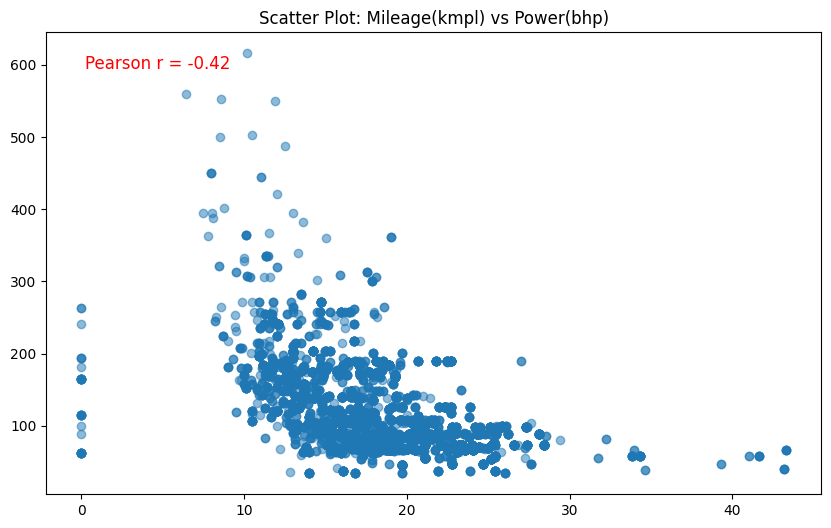

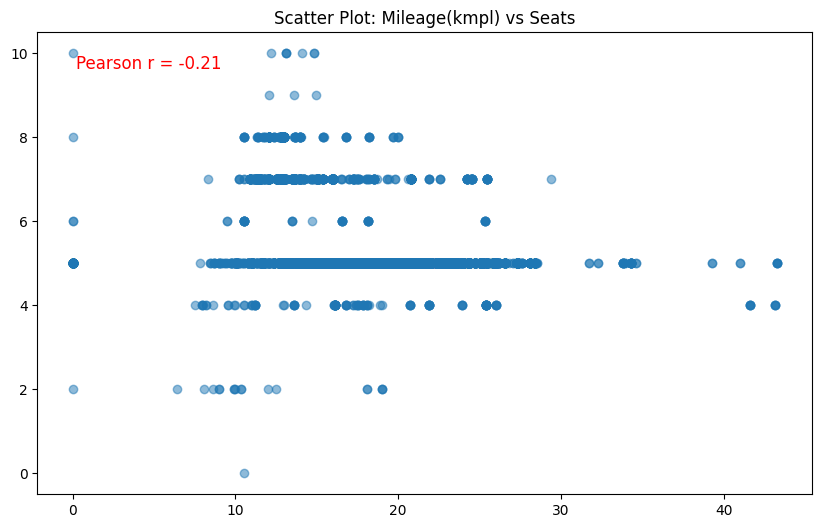

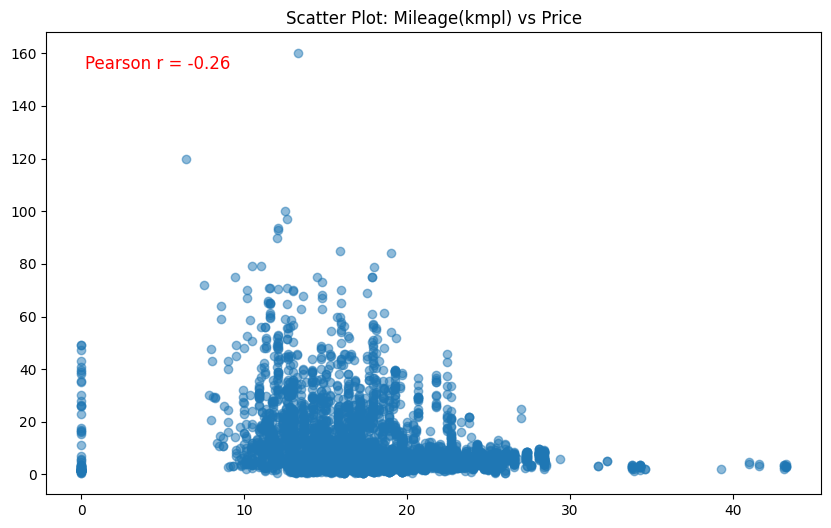

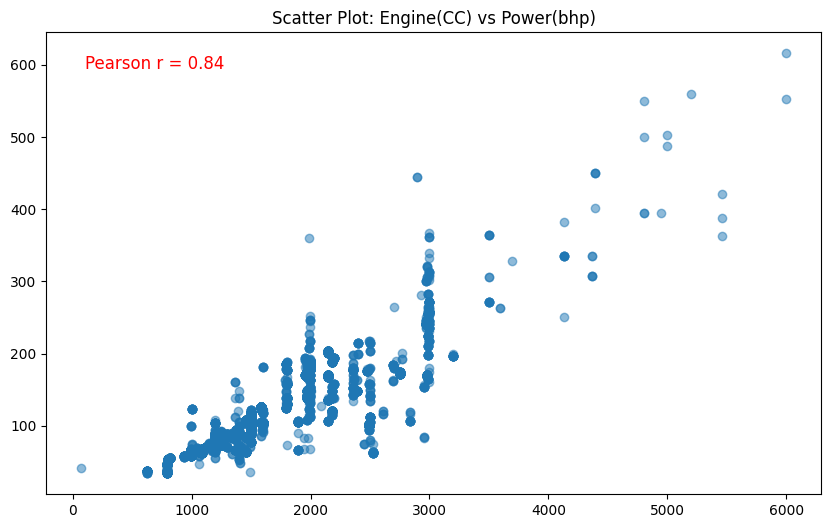

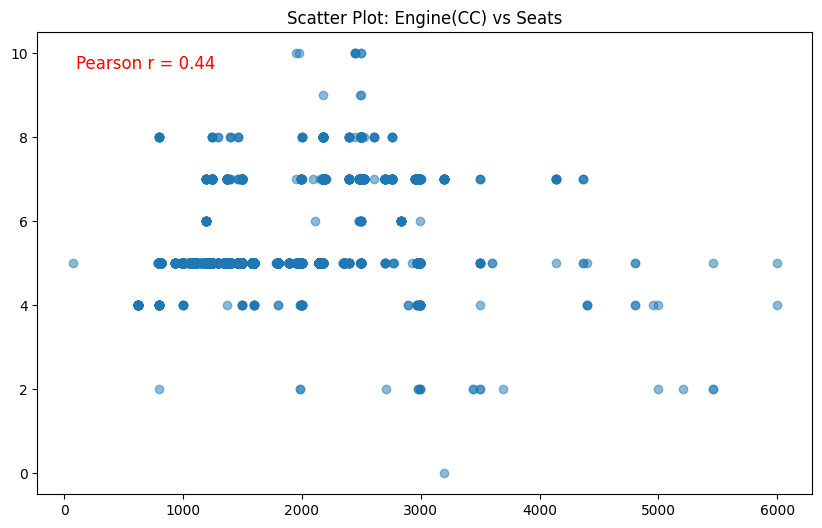

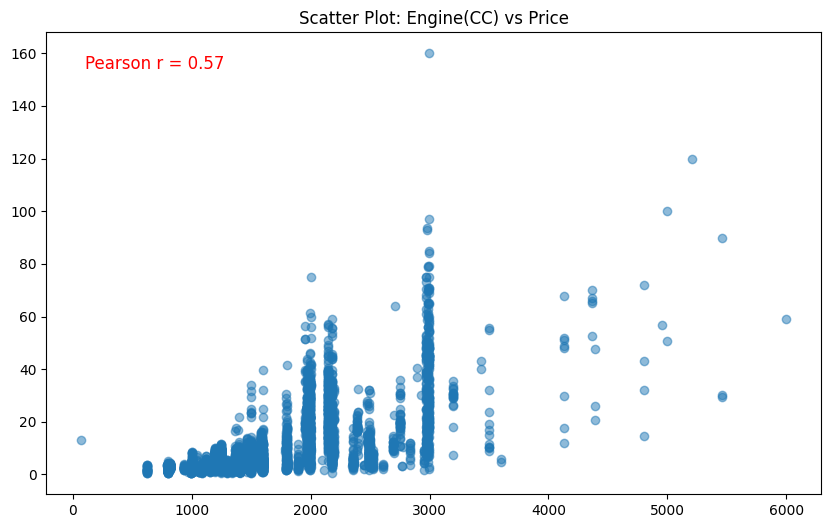

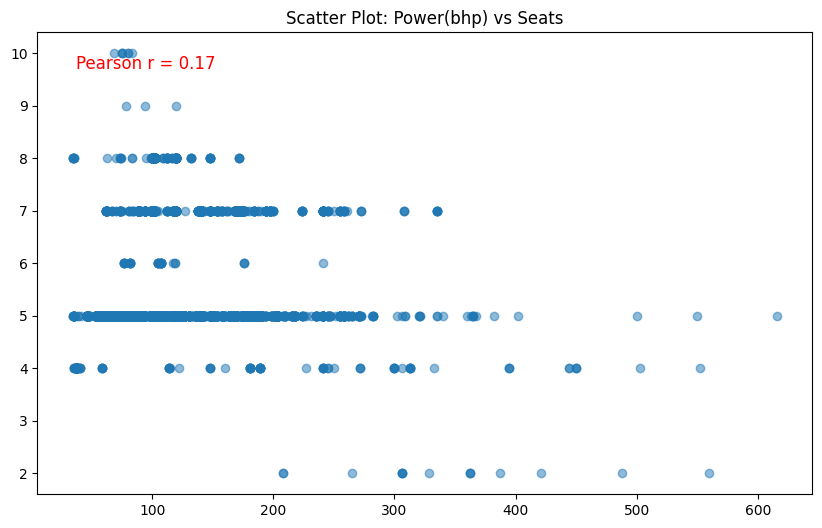

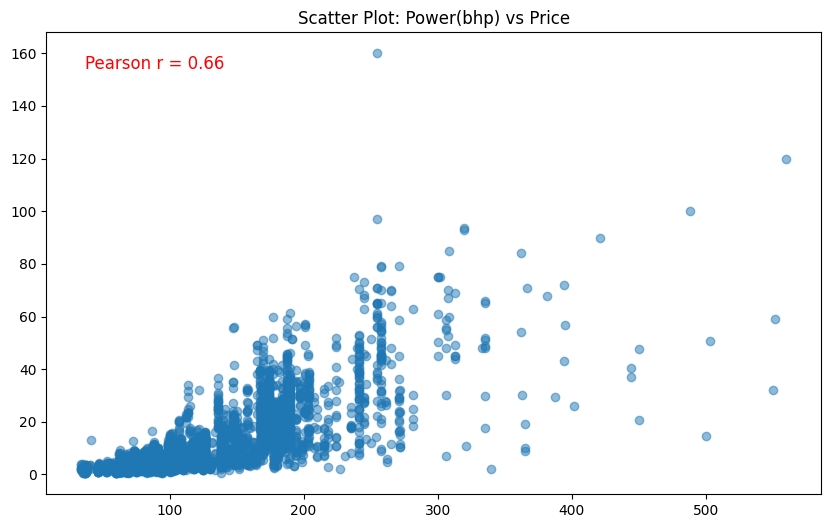

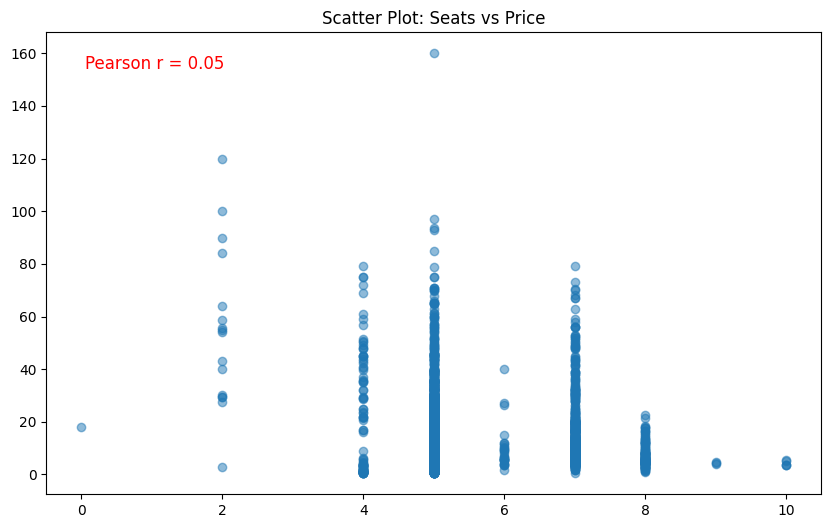

In [228]:
def calculatePearson(xCol, yCol):
  n = len(data)
    
  sumX = data[xCol].sum()
  sumY = data[yCol].sum()

  sumXSquared = (data[xCol] ** 2).sum()
  sumYSquared = (data[yCol] ** 2).sum()
  sumProductXY = (data[xCol] * data[yCol]).sum()
  
  return((n * sumProductXY) - (sumX * sumY)) / np.sqrt(((n * sumXSquared) - (sumX ** 2)) * ((n * sumYSquared) - (sumY ** 2)))
    

data = pd.read_csv('used_cars_data_converted.csv')

toCompare = ['Car_Age', 'Kilometers_Driven','Mileage(kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats', 'Price']

for i in range(len(toCompare)):
  for j in range(len(toCompare)):
    if i < j:
      col1 = toCompare[i]
      col2 = toCompare[j]
      R = calculatePearson(col1, col2)
      plt.figure(figsize=(10, 6))
      plt.scatter(data[col1], data[col2], alpha=0.5)
      plt.title(f'Scatter Plot: {col1} vs {col2}')
      plt.text(0.05, 0.95, f'Pearson r = {R:.2f}', transform=plt.gca().transAxes,
                     fontsize=12, verticalalignment='top', color='red')
      plt.show()